## MLSC - Classification Excercise


### Program Offered: M. Tech / Data Science
### Course Title:  Machine Learning Supervised Classification (MLSC)

### Group Number: 5
### Name of the Project Members
<font color='blue' size=3> 1. Vinod A <br>
2. Ramarajan V <br>
3. Francis Alexandre Akshay Rajan </font> 

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context 

**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

# Table of Content

1. Data Preprocessing - **3 Marks**
2. Logistic Regression Model - **3 Marks**
3. Decision Tree Model - **3 Marks**
4. Random Forest Model - **3 Marks**
5. XGBoost Model - **3 Marks**
6. K Nearest Neighbors Model - **3 Marks**
7. Naive Bayes Model - **3 Marks**
8. Compare the Results of all the above mentioned algorithms - **4 Marks**
9. Intrepret your solution based on the results - **5 Marks**


<a id="logreg"> </a>
## 1. Data Pre-Processing

**Import the required libraries**

In [1]:
# pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score,log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,auc, roc_curve,roc_auc_score

#### Load the csv file

In [3]:
df = pd.read_csv('bank.csv')

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB
None


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the outliers (if any) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

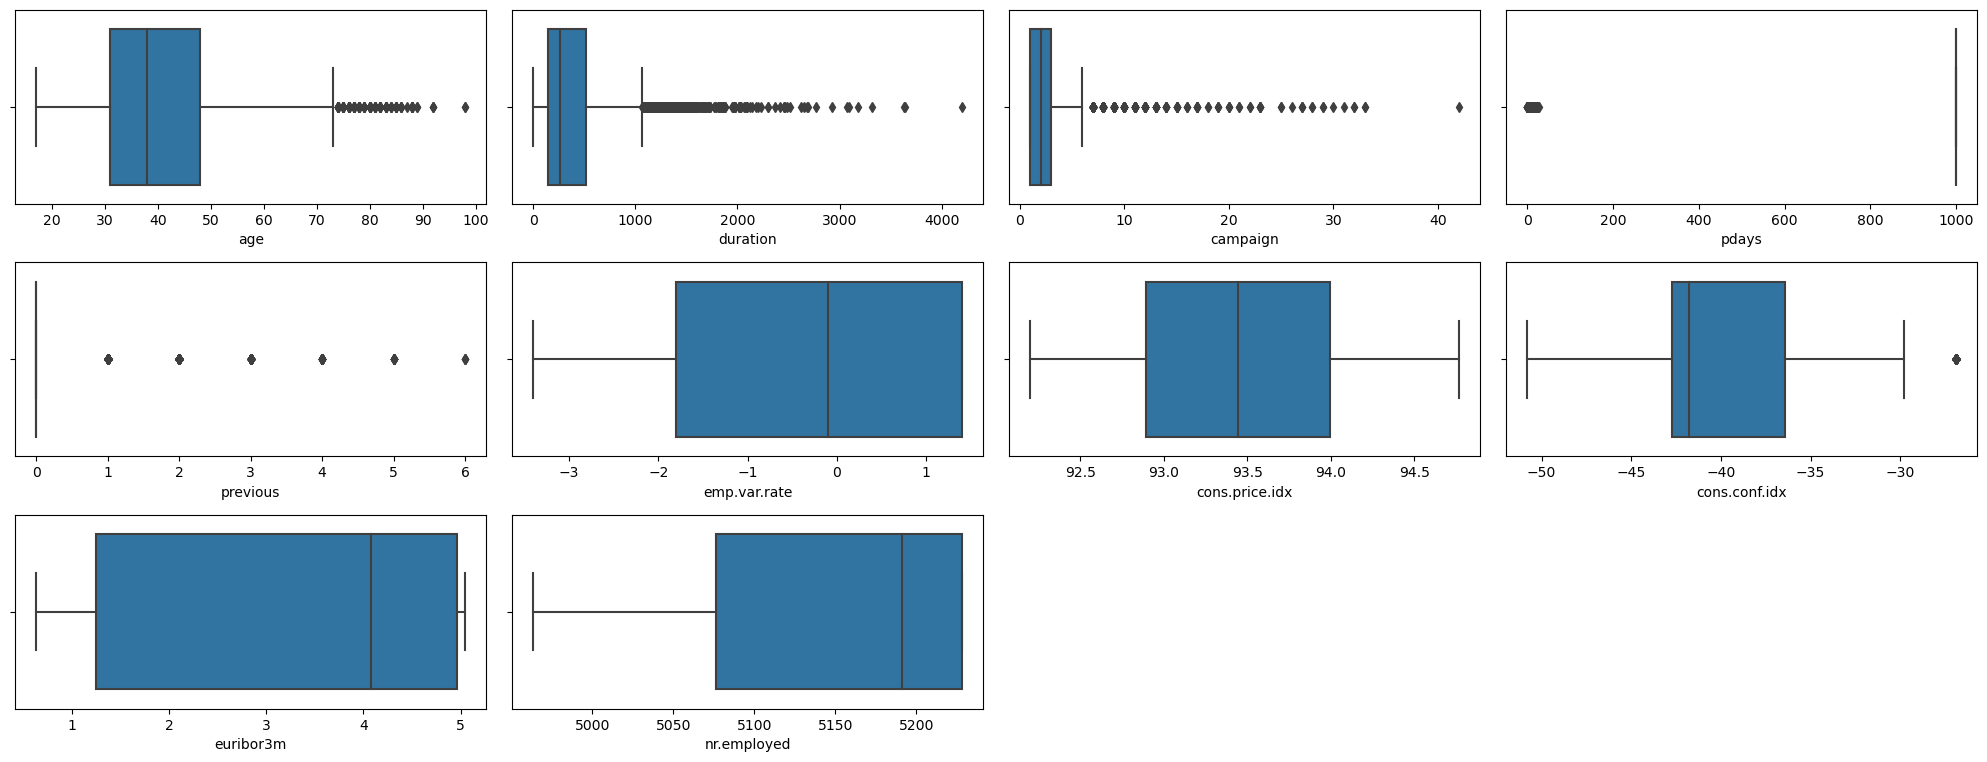

In [6]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    plt.subplot(round(len(df.columns))+1,4,i+1)
    sns.boxplot(df[col])
plt.tight_layout()

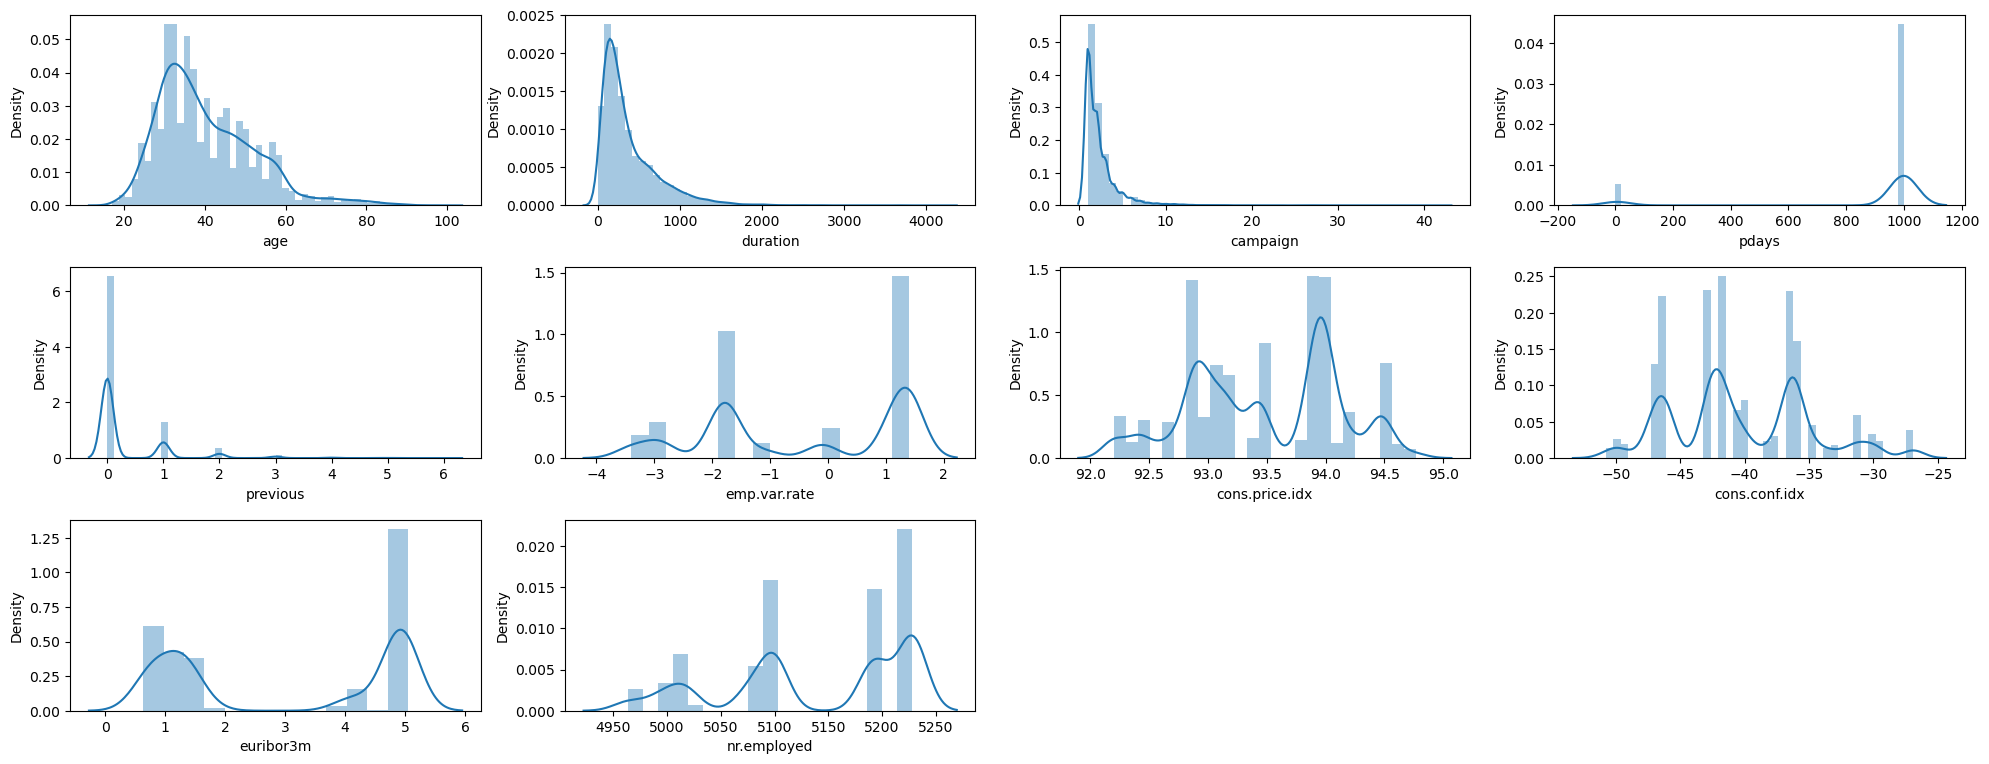

In [7]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df.select_dtypes(exclude='object').columns):
    plt.subplot(round(len(df.columns))+1,4,i+1)
    sns.distplot(df[col])
plt.tight_layout()

#### INFERENCE:   <font color='006600' size=3> &nbsp; As per requesties the datas are loaded using the pandas library and checked with missing values. Here there is no missing values , so its been contitued with outlier detectinn</font>
<br>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df['y'].replace(['yes','no'],[0,1],inplace=True)
depVar = df.drop(columns='y')
indepVar = df['y']

<AxesSubplot:>

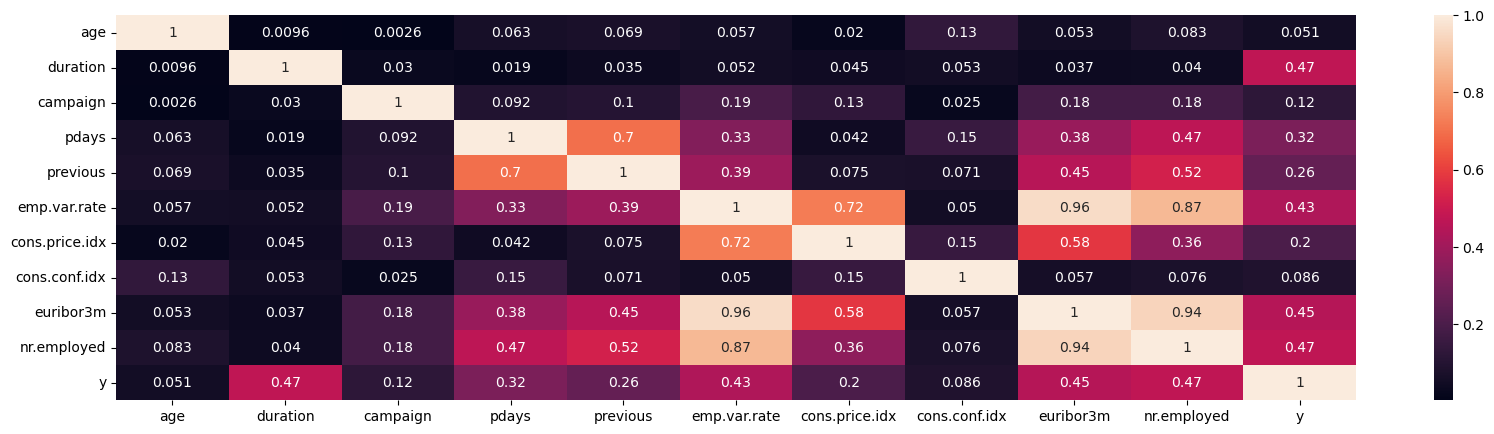

In [9]:
plt.figure(figsize=(20,5))
sns.heatmap(abs(df.corr()), annot=True)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the unnecessary variables that will not contribute to the model. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# droping 'age' as per corelation value with respect to independent variable
depVar.drop(columns=['age'], inplace=True)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of all the numeric variables and find the value of skewness for each variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
skewness = pd.DataFrame(depVar.skew(axis=0), columns=['Skewness'])
skewness

,Skewness
duration,2.256322
campaign,5.098841
pdays,-2.549356
previous,2.895599
emp.var.rate,-0.181234
cons.price.idx,-0.125216
cons.conf.idx,0.350442
euribor3m,-0.058332
nr.employed,-0.463581


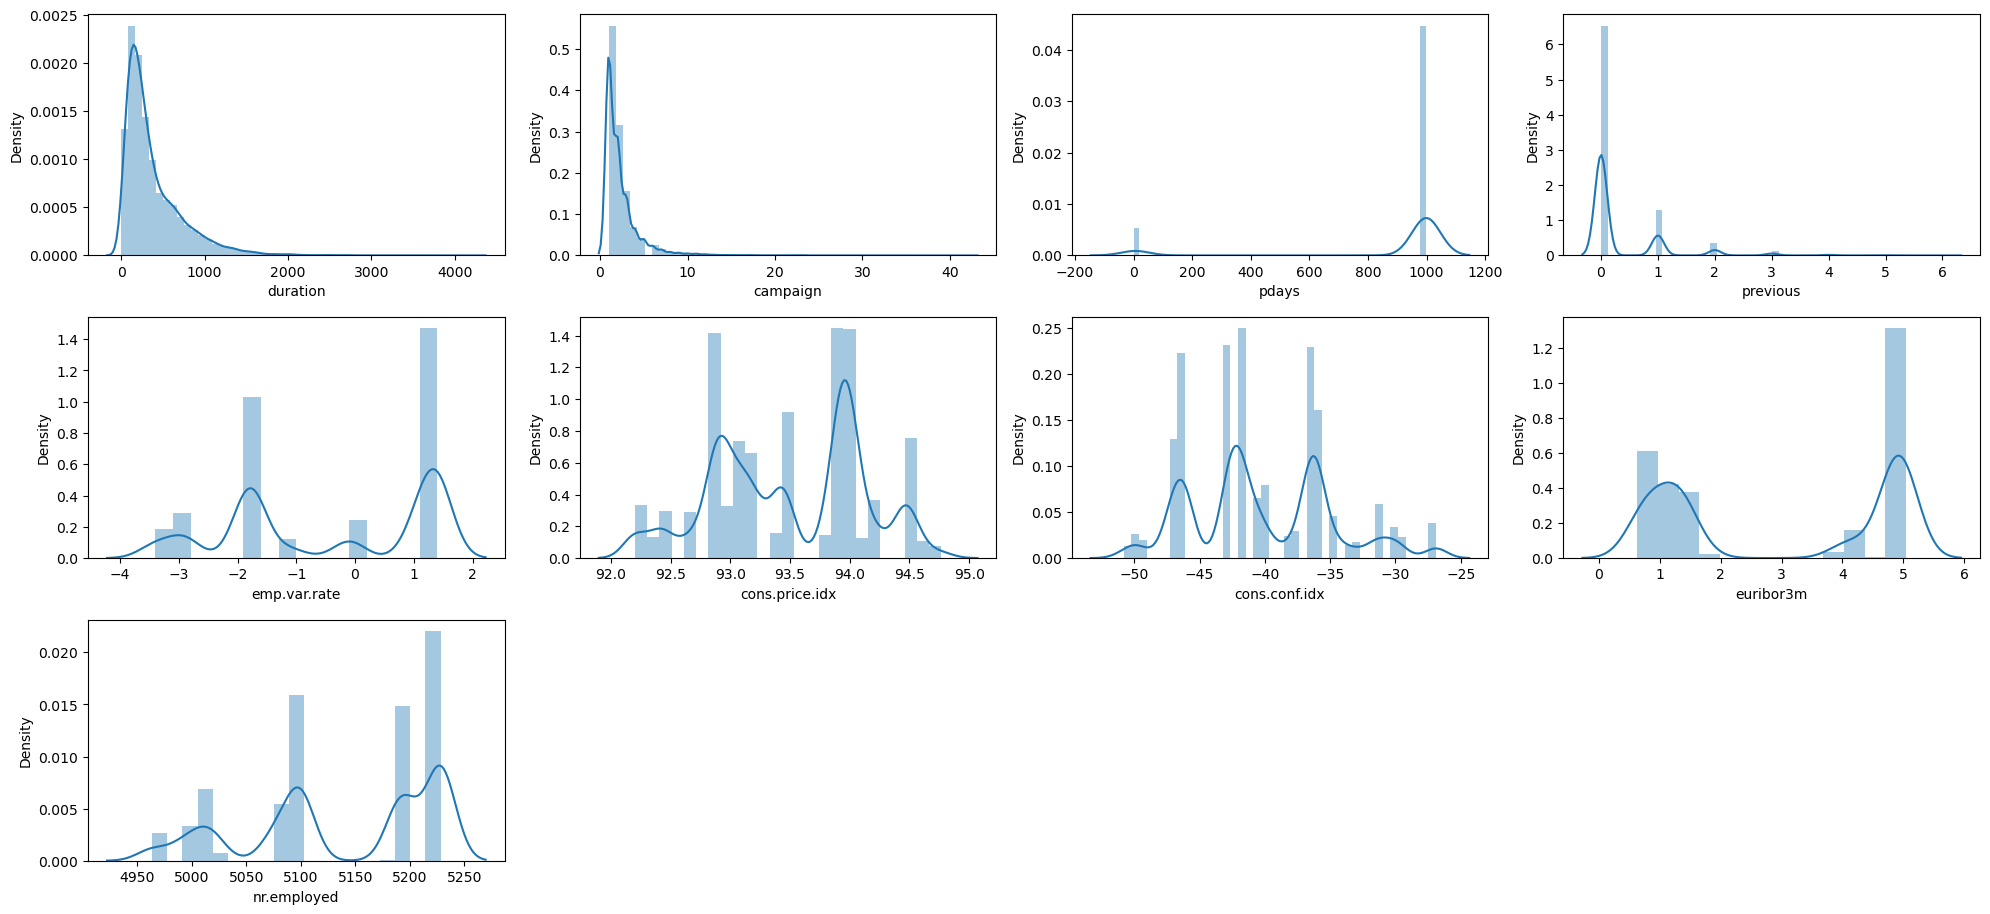

In [12]:
plt.figure(figsize=(20,30))
for i, col in enumerate(depVar.columns):
    plt.subplot(round(len(depVar.columns))+1,4,i+1)
    sns.distplot(depVar[col])
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

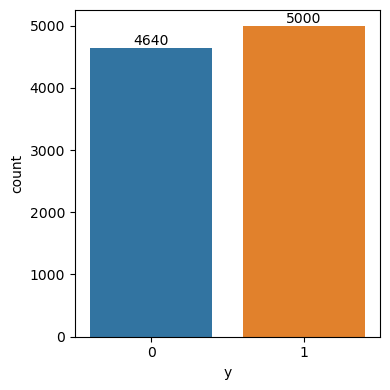

In [13]:
plt.figure(figsize=(4,4))
ax = sns.countplot(indepVar)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
scaler = StandardScaler()
temp = scaler.fit_transform(depVar)
depVar = pd.DataFrame(temp, columns=depVar.columns)
depVar.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.492076,-0.146440,0.345494,-0.447172,0.908285,0.805042,0.726230,0.983194,0.620697
1,0.877903,3.208708,0.345494,-0.447172,1.082931,0.684662,-0.457420,1.037275,1.050379
2,-0.943098,2.369921,0.345494,-0.447172,1.082931,-0.066130,0.782594,1.038865,1.050379
3,0.057607,-0.565833,-2.897406,2.474374,-0.372451,1.766500,-1.735011,-1.045350,-2.012985
4,1.475507,-0.146440,0.345494,1.013601,-0.779958,-0.650607,-1.284096,-0.842284,-0.443662


<br><br>


### User Defined Model Function

In [15]:
def model_func(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculating precision
    precision = precision_score(y_test, y_pred)
    # Calculating recall
    recall = recall_score(y_test, y_pred)
    # Calculating F1 score
    f1 = f1_score(y_test, y_pred)
    # Calculating Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    cross_entropy = log_loss(y_test, y_pred)
    roc_score = roc_auc_score(y_test,y_pred)
    return model, y_pred, {"Precision Score":precision,"Recall Score": recall,"F1 Score":f1, 
                           "Accuracy Score":accuracy}, [fpr, tpr, roc_score],cross_entropy

### User Defined GridSearchCV Function

In [16]:
def GridSearchCV_func(param_grid,model,X_train, y_train, X_test):
    # Create GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, cv=5)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Print the best hyperparameters
    print("Best Hyperparameters:", best_params)

    # Evaluate the best model on the test set
    accuracy = best_model.score(X_test, y_test)
    print("Accuracy on Test Set:", accuracy)
    # Prediction
    y_pred = best_model.predict(X_test)

    # Calculating precision
    precision = precision_score(y_test, y_pred)

    # Calculating recall
    recall = recall_score(y_test, y_pred)

    # Calculating F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Calculating Accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return {"Precision Score":precision,"Recall Score": recall,"F1 Score":f1,"Accuracy Score":accuracy}

#### INFERENCE:   <font color='006600' size=3> &nbsp; User defined model creation function and Gridsize function is been created for multiple use and iteration</font>
<br><br>

<a id="logreg"> </a>
## 2. Logistic regression model

In [17]:
X, y = depVar, indepVar

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [19]:
# LogisticRegression
clf_lr = LogisticRegression(random_state=0)
clf_lr, y_pred, score_lr, roc_auc_lr,cross_entropy_lr = model_func(clf_lr, X_train, y_train, X_test)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How does a unit change in each feature influence the odds of a client subscribed a term deposit or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
coefficient_array = clf_lr.coef_
# Calculate the odds ratio
odds_ratios = np.exp(coefficient_array)
pd.DataFrame(data=odds_ratios[0],index=depVar.columns, columns=['Odds Ratio'])

,Odds Ratio
duration,0.090569
campaign,1.044517
pdays,1.985513
previous,1.254002
emp.var.rate,4.914505
cons.price.idx,0.770812
cons.conf.idx,0.889785
euribor3m,0.418371
nr.employed,2.946871


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal threshold</b>
                </font>
            </div>
        </td>
    </tr>
</table> 

In [21]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = clf_lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Finding optimal threshold using Youden's Index
youdens_table = pd.DataFrame({'TPR': tpr,
 'FPR': fpr,
'Threshold': thresholds})
# calculate the difference between TPR and FPR for each threshold and store the values in a new co
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
# sort the dataframe based on the values of difference
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.844246,0.148913,1,0.695333
1,0.000000,0.000000,2,0.000000
2,1.000000,1.000000,0,0.000000


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Labels before applying threshold:	 [1 0 0 ... 0 1 1]
Labels after applying threshold:	 [1 0 0 ... 0 1 1]


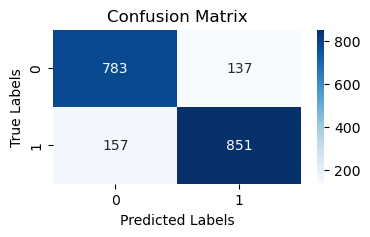

Accuracy: 0.8475103734439834


In [22]:
# Prediction
y_pred = clf_lr.predict(X_test)
print("Labels before applying threshold:\t",y_pred)

# Applying the probability threshold of 0.5 to obtain binary predictions
predicted_labels = (y_pred >= 0.5).astype(int)
print("Labels after applying threshold:\t",predicted_labels)

# Creating the confusion matrix
confusion_mat = confusion_matrix(y_test, predicted_labels)
# Plot the confusion matrix
plt.figure(figsize=(4,2))
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
# Extracting the values from the confusion matrix
tn, fp, fn, tp = confusion_mat.ravel()

# Calculating accuracy manually
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy:", accuracy)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate value of kappa for the full model . Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# Prediction
y_pred = clf_lr.predict(X_test)
print("Labels before applying threshold:\t",y_pred)

# Applying the threshold of 0.18 to obtain binary predictions
predicted_labels = (y_pred >= 0.18).astype(int)
print("Labels after applying threshold:\t",predicted_labels)

# Creating the confusion matrix
confusion_mat = confusion_matrix(y_test, predicted_labels)

# Calculating kappa
kappa = cohen_kappa_score(y_test, predicted_labels)

print("Kappa:", kappa)

Labels before applying threshold:	 [1 0 0 ... 0 1 1]
Labels after applying threshold:	 [1 0 0 ... 0 1 1]
Kappa: 0.6946737912608808


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate the cross entropy for the logistic regression model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# Calculating cross entropy
print("Cross Entropy:", cross_entropy_lr)

Cross Entropy: 5.2668619320288785


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Predict whether a client subscribed a term deposit or not. For the logistic regression model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
pd.DataFrame([score_lr], index=['Logistic Regression'])

,Precision Score,Recall Score,F1 Score,Accuracy Score
Logistic Regression,0.861336,0.844246,0.852705,0.84751


<br><br>

## 3.Build a Decision Tree model and generate a classification report.



In [26]:
# Create a Decision Tree classifier
clf_dt = DecisionTreeClassifier()

clf_dt, y_pred , score_dt,roc_auc_dt,cross_entropy_dt = model_func(clf_dt, X_train, y_train, X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       920
           1       0.84      0.84      0.84      1008

    accuracy                           0.83      1928
   macro avg       0.83      0.83      0.83      1928
weighted avg       0.83      0.83      0.83      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# Define the parameter grid to search through
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
best_model_scores_dt = GridSearchCV_func(param_grid,clf_dt,X_train, y_train, X_test)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy on Test Set: 0.8713692946058091


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
pd.DataFrame([score_dt,best_model_scores_dt], index=['Full Model Score', 'Optimized Model Score'])

,Precision Score,Recall Score,F1 Score,Accuracy Score
Full Model Score,0.835953,0.844246,0.840079,0.831950
Optimized Model Score,0.916667,0.829365,0.870833,0.871369


<br><br>

## 4.Build a Random Forest model with n_estimators=30 and generate a classification report.



In [29]:
# Create a Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=30)

clf_rf, y_pred, score_rf,roc_auc_rf,cross_entropy_rf= model_func(clf_rf, X_train, y_train, X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       920
           1       0.90      0.84      0.87      1008

    accuracy                           0.87      1928
   macro avg       0.87      0.87      0.87      1928
weighted avg       0.87      0.87      0.87      1928



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# Define the parameter grid to search through
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
best_model_scores_rf = GridSearchCV_func(param_grid,clf_rf,X_train, y_train, X_test)

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 4}
Accuracy on Test Set: 0.8744813278008299


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
pd.DataFrame([score_rf,best_model_scores_rf], index=['Full Model Score', 'Optimized Model Score'])

,Precision Score,Recall Score,F1 Score,Accuracy Score
Full Model Score,0.902674,0.837302,0.868760,0.867739
Optimized Model Score,0.927455,0.824405,0.872899,0.874481


<br><br>

## 5.Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix

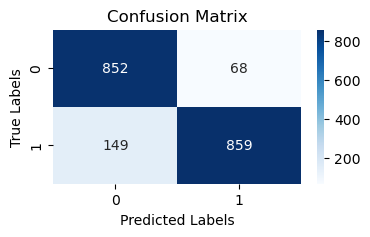

In [32]:
# Create an XGBoost classifier
clf_xgb = XGBClassifier(learning_rate=0.4, gamma=3)

clf_xgb, y_pred, score_xgb,roc_auc_xgb,cross_entropy_xgb = model_func(clf_xgb, X_train, y_train, X_test)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# Define the parameter grid to search through
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'gamma': [0, 1, 2, 3],
    'max_depth': [3, 5, 7]
}

best_model_scores_xgb = GridSearchCV_func(param_grid,clf_xgb,X_train, y_train, X_test)

Best Hyperparameters: {'gamma': 2, 'learning_rate': 0.2, 'max_depth': 7}
Accuracy on Test Set: 0.8874481327800829


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
pd.DataFrame([score_xgb,best_model_scores_xgb], index=['Full Model Score', 'Optimized Model Score'])

,Precision Score,Recall Score,F1 Score,Accuracy Score
Full Model Score,0.926645,0.852183,0.887855,0.887448
Optimized Model Score,0.927568,0.851190,0.887739,0.887448


<br><br>

## 6.Build the K - Nearest Neighbor Model

In [35]:
# Create a KNN classifier with k=5
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn, y_pred, score_knn,roc_auc_knn,cross_entropy_knn = model_func(clf_knn, X_train, y_train, X_test)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal K-Value using Elbow Curve Method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

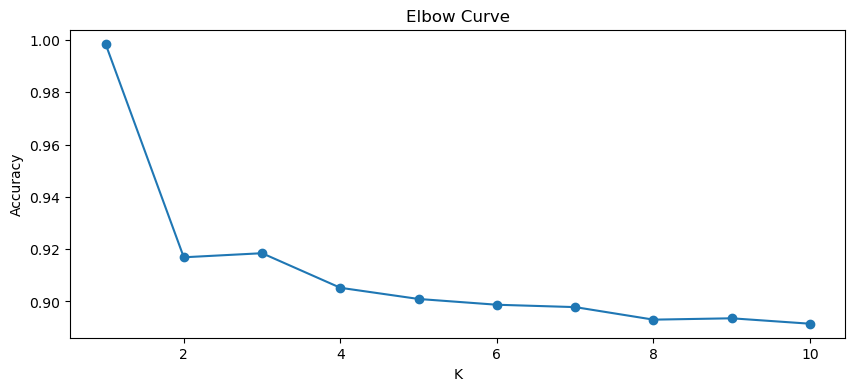

In [36]:
k_values = range(1, 11)
inertia = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    inertia.append(knn.score(X_train, y_train))

# Plot the Elbow Curve
plt.figure(figsize=(10,4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Elbow Curve')
plt.show()

<br><br>

## 7. Build the Naive Bayes Model

In [37]:
# Create a Gaussian Naive Bayes classifier
clf_g_nb = GaussianNB()
clf_g_nb, y_pred, score_g_nb,roc_auc_g_nb,cross_entropy_g_nb = model_func(clf_g_nb, X_train, y_train, X_test)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the classification results of Gaussian, Bernoulli and Multinomial Naive Bayes</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# Create Bernoulli Naive Bayes classifier
clf_b_nb = BernoulliNB()
clf_b_nb, y_pred, score_b_nb,roc_auc_b_nb,cross_entropy_b_nb = model_func(clf_b_nb, X_train, y_train, X_test)

In [39]:
X_, y_ = depVar, indepVar

In [40]:
min_scaler = MinMaxScaler()
X_ = min_scaler.fit_transform(X_)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.20, random_state=23)

In [42]:
# Create Multinomial Naive Bayes classifier
clf_m_nb = MultinomialNB()
clf_m_nb, y_pred, score_m_nb,roc_auc_m_nb,cross_entropy_m_nb = model_func(clf_m_nb, X_train, y_train, X_test)

In [43]:
pd.DataFrame([score_g_nb,score_b_nb,score_m_nb], index=['Gaussian Naive Bayes','Bernoulli Naive Bayes',
                                                        'Multinomial Naive Bayes'])

,Precision Score,Recall Score,F1 Score,Accuracy Score
Gaussian Naive Bayes,0.787453,0.834325,0.810212,0.795643
Bernoulli Naive Bayes,0.732995,0.716270,0.724536,0.715249
Multinomial Naive Bayes,0.713572,0.850198,0.775917,0.743257


<br><br>

## 8. Compare the results of all above mentioned algorithms 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using model performance evaluation metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
# comaparism with respect to Accuracy score
pd.DataFrame([score_lr,score_dt,score_rf, score_xgb, score_g_nb,score_b_nb,score_m_nb],
             index=['Logistic Regression','Decision Tree','Random Forest','XGBoost',
                    'Gaussian Naive Bayes','Bernoulli Naive Bayes','Multinomial Naive Bayes']).sort_values(
    by='Accuracy Score', ascending=False)

,Precision Score,Recall Score,F1 Score,Accuracy Score
XGBoost,0.926645,0.852183,0.887855,0.887448
Random Forest,0.902674,0.837302,0.868760,0.867739
Logistic Regression,0.861336,0.844246,0.852705,0.847510
Decision Tree,0.835953,0.844246,0.840079,0.831950
Gaussian Naive Bayes,0.787453,0.834325,0.810212,0.795643
Multinomial Naive Bayes,0.713572,0.850198,0.775917,0.743257
Bernoulli Naive Bayes,0.732995,0.716270,0.724536,0.715249


In [45]:
# comaparism with respect to Precession score
pd.DataFrame([score_lr,score_dt,score_rf, score_xgb, score_g_nb,score_b_nb,score_m_nb],
             index=['Logistic Regression','Decision Tree','Random Forest','XGBoost',
                    'Gaussian Naive Bayes','Bernoulli Naive Bayes','Multinomial Naive Bayes']).sort_values(
    by='Precision Score', ascending=False)

,Precision Score,Recall Score,F1 Score,Accuracy Score
XGBoost,0.926645,0.852183,0.887855,0.887448
Random Forest,0.902674,0.837302,0.868760,0.867739
Logistic Regression,0.861336,0.844246,0.852705,0.847510
Decision Tree,0.835953,0.844246,0.840079,0.831950
Gaussian Naive Bayes,0.787453,0.834325,0.810212,0.795643
Bernoulli Naive Bayes,0.732995,0.716270,0.724536,0.715249
Multinomial Naive Bayes,0.713572,0.850198,0.775917,0.743257


In [46]:
# comaparism with respect to Recall score
pd.DataFrame([score_lr,score_dt,score_rf, score_xgb, score_g_nb,score_b_nb,score_m_nb],
             index=['Logistic Regression','Decision Tree','Random Forest','XGBoost',
                    'Gaussian Naive Bayes','Bernoulli Naive Bayes','Multinomial Naive Bayes']).sort_values(
    by='Recall Score', ascending=False)

,Precision Score,Recall Score,F1 Score,Accuracy Score
XGBoost,0.926645,0.852183,0.887855,0.887448
Multinomial Naive Bayes,0.713572,0.850198,0.775917,0.743257
Logistic Regression,0.861336,0.844246,0.852705,0.847510
Decision Tree,0.835953,0.844246,0.840079,0.831950
Random Forest,0.902674,0.837302,0.868760,0.867739
Gaussian Naive Bayes,0.787453,0.834325,0.810212,0.795643
Bernoulli Naive Bayes,0.732995,0.716270,0.724536,0.715249


In [47]:
# comaparism with respect to F1 score
pd.DataFrame([score_lr,score_dt,score_rf, score_xgb, score_g_nb,score_b_nb,score_m_nb],
             index=['Logistic Regression','Decision Tree','Random Forest','XGBoost',
                    'Gaussian Naive Bayes','Bernoulli Naive Bayes','Multinomial Naive Bayes']).sort_values(
    by='F1 Score', ascending=False)

,Precision Score,Recall Score,F1 Score,Accuracy Score
XGBoost,0.926645,0.852183,0.887855,0.887448
Random Forest,0.902674,0.837302,0.868760,0.867739
Logistic Regression,0.861336,0.844246,0.852705,0.847510
Decision Tree,0.835953,0.844246,0.840079,0.831950
Gaussian Naive Bayes,0.787453,0.834325,0.810212,0.795643
Multinomial Naive Bayes,0.713572,0.850198,0.775917,0.743257
Bernoulli Naive Bayes,0.732995,0.716270,0.724536,0.715249


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using their ROC curves.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

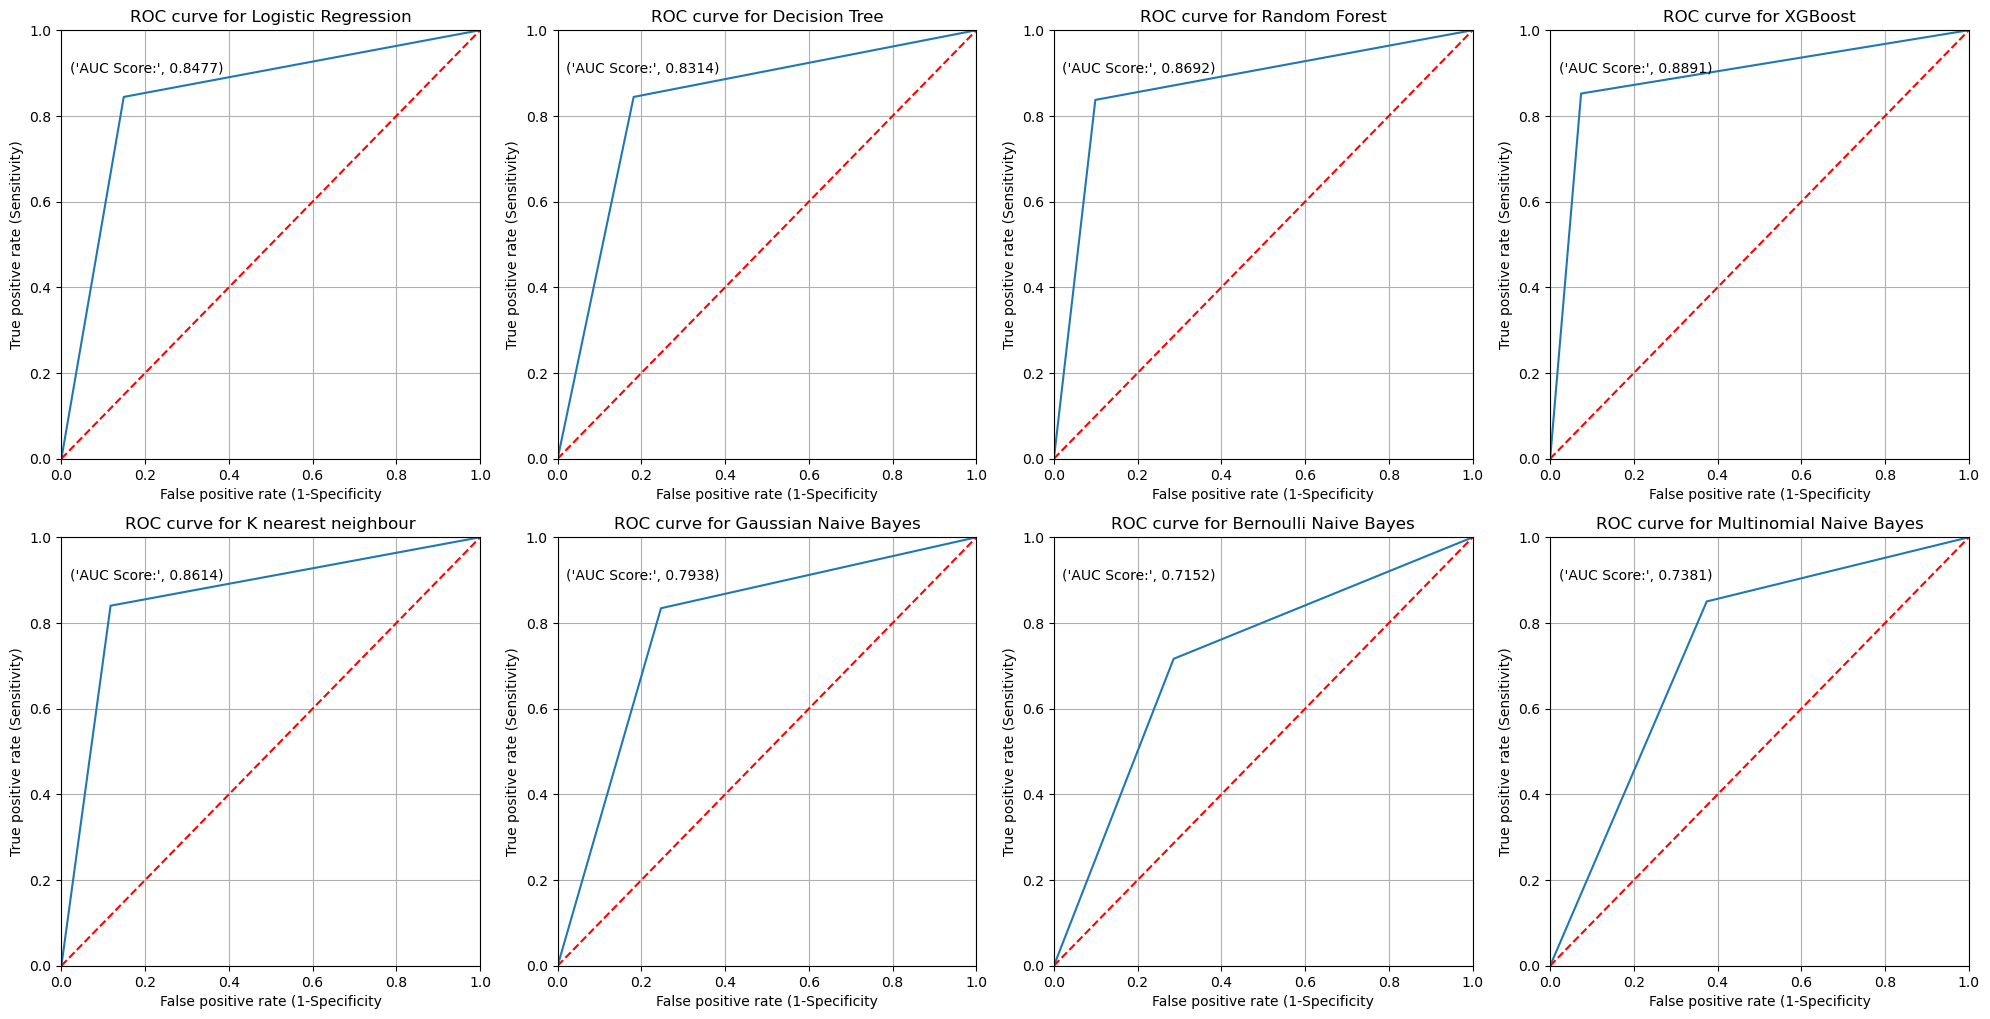

In [48]:
plt.figure(figsize=(20,20))
AUC_Scores = []
modelName = ['Logistic Regression',
            'Decision Tree',
            'Random Forest',
            'XGBoost',
            'K nearest neighbour',
            'Gaussian Naive Bayes','Bernoulli Naive Bayes','Multinomial Naive Bayes']
for i, roc_auc in enumerate([roc_auc_lr,roc_auc_dt,roc_auc_rf,roc_auc_xgb,
                          roc_auc_knn,roc_auc_g_nb,roc_auc_b_nb,roc_auc_m_nb]):
    plt.subplot(round(len(roc_auc))+1,4,i+1)
    plt.plot(roc_auc[0], roc_auc[1])

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for '+modelName[i])
    plt.xlabel('False positive rate (1-Specificity')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc[2],4)))
    plt.grid(True)
    AUC_Scores.append( round(roc_auc[2],4))
plt.tight_layout()

In [49]:
pd.DataFrame([AUC_Scores],index=['AUC_score'],columns=modelName).transpose().sort_values(
    by='AUC_score', ascending=False)

,AUC_score
XGBoost,0.8891
Random Forest,0.8692
K nearest neighbour,0.8614
Logistic Regression,0.8477
Decision Tree,0.8314
Gaussian Naive Bayes,0.7938
Multinomial Naive Bayes,0.7381
Bernoulli Naive Bayes,0.7152


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>comput cross entropy and Compare all the classification models.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
pd.DataFrame([cross_entropy_lr,cross_entropy_dt,cross_entropy_rf, cross_entropy_xgb, cross_entropy_g_nb,
              cross_entropy_b_nb,cross_entropy_m_nb],
             index=['Logistic Regression','Decision Tree','Random Forest','XGBoost',
                    'Gaussian Naive Bayes','Bernoulli Naive Bayes','Multinomial Naive Bayes'],
            columns=['Cross Entropy']).sort_values(by='Cross Entropy')

,Cross Entropy
XGBoost,3.887432
Random Forest,4.568185
Logistic Regression,5.266862
Decision Tree,5.804303
Gaussian Naive Bayes,7.058330
Multinomial Naive Bayes,8.867723
Bernoulli Naive Bayes,9.835061


<br><br>

## 9. Intrepret your solution based on the results


1. ROC Curve: The ROC curve visualizes the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for each classification model. A good classifier will have an ROC curve that is closer to the top-left corner of the plot, indicating higher TPR and lower FPR across different threshold values.

    -- As per above plots we can get that <b>XGBoost's</b> corner point is most nearer to the top-left corner'<br><br>

2. AUC (Area Under the Curve): The AUC represents the overall performance of the model. A higher AUC value indicates better discrimination ability and a better-performing model. In the legend of the ROC curve plot, the AUC values are displayed for each model.

    -- As per above plots with respect to <b> AUC score : 0.8891</b> , the XGBoost fits the most<br><br>

3. Model Comparison: By comparing the ROC curves and AUC values of the different models, you can assess their relative performance. A model with a higher AUC value generally indicates better predictive accuracy and a higher ability to distinguish between classes. Therefore, you can choose the model with the highest AUC value as the best-performing model for the given dataset.

    -- In total on comparing the <b>ROC curves and AUC score</b>, the XGboost helps us to get the proper classification.<br><br>
    
4. Cross-entropy value: The <b>XGBoost's 3.887432</b> value defines that it fits for proper classification<br>
5. With respect to classifiation metrics, the <b>XGBoost </b>algorithm stands up the top in <br>
        a. Accuracy Score : 0.887448
        b. Precession Score : 0.926645
        c. Recall Score : 0.852183
        d. F1 score : 0.887855